# Practical 05 - Data Classification

This practical is designed to be run over two weeks.
You are encouraged to complete as much of the prac as you can before the second week so that we can spend time addressing questions and problems that people have.

As usual, you should save a copy of this notebook in Google drive (or on your own system if not using Colaboratory)


# Q1 Iris classification
We will begin by running some classification algorithms on the Iris data set.
This is one of the most commonly used machine learning datasets for classification. The data can be found at the [UCI repository](https://archive.ics.uci.edu/ml/datasets/iris), however it's small size and large popularity means that many machine learning libraries are bundled with the data.

In this task you will explore some of the basics of data classification using [scikit-learn](https://scikit-learn.org/stable/index.html) (`sklearn`).

1. Import the Iris data from `sklearn`. Read the documenation that describes the data, what the attributes are, and what the classification task is.
1. Split the data into two subsets:
  - A training subset comprising 75% of the data
  - A testing subset comprising 25% of the data
1. Using the k-NN classifier (`sklearn.neighbors.NearestNeighbors`):
  - Train the classifier with the following options and record the error rate:
    - `weights = uniform` or `distance`
    - `k = 1, 3, 7, 11, 17,` or `21`
  - Of the 12 combinations of the above, choose the one with the lowest error rate as your *champion*.
  - Train your *champoin* using the entire training data-set, and evaluate it on the test test.
  - Create a confusion matrix by comparing the predicted and actual classes for the test data.
1. Using a descision tree classifier:
 - Train the classifier using both the `Gini index` and `entropy` criterion for splitting.
 - Choose the classifier which has the highest F1 score as your best classifier.
 - Plot the descision tree for your best classifier.
1. Using a naive-Bayes clasffieir:
 - Train the classifier on all the training data.
 - Predict the classes of the test data.
 - Plot a confusion matrix.

## Import the Iris data from sklearn.
Read the documenation that describes the data, what the attributes are, and what the classification task is.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [ ]:
iris = datasets.load_iris()
# Inspect the data structure
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_df = pd.DataFrame(data=np.hstack((iris['data'], iris['target'][:,None])),
                       columns=iris['feature_names']+['species'])
iris_df

AttributeError: ignored

In [ ]:
# read the description to learn more about the data set
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Split the data into two subsets
 Split the data into two subsets:
  - A training subset comprising 75% of the data
  - A testing subset comprising 25% of the data

In [ ]:
# Normally our we are given train/test data separately
# hewever for this prac we will take 25% of the iris data can pretend that it's test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                    test_size=0.25, # use a teste sieve of 25%
                                                    random_state=4) # this random state ensures that we get the same subset each time we call this cell

In [ ]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

You should see that the two shapes have the same number of features (columns, 4), and that the ratio is 75:25 for the number of instances (rows, 112:32)

## Explore different ways to split data for cross validation

sklearn provides three methods to divide data into train/test sets:
- ShuffleSplit
  - Random sampling
- Kfold
  - Ordered sampling
- StratifiedKFold
  - Stratified sampling

Use each of the above methods to create a 10 fold split of the data for cross validation and visualise the splits.

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, ShuffleSplit

In [ ]:
# This is random sampling
ss = ShuffleSplit(n_splits=10, test_size=15, random_state=4)
# This is non-random sampling, we just break the data in to 10 contiguous sub-sets
kf = KFold(n_splits=10)
# Ensuring the balance between classes in the model/validate sets
# means we should use stratified sampling
skf = StratifiedKFold(n_splits=10)


In [ ]:
# This cell sets up a nice visulisation that I found on the scikit-learn documentation page.
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """
    Create a sample plot for indices of a cross-validation object.
    Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#define-a-function-to-visualize-cross-validation-behavior

    Parameters
    ----------
    cv: cross validation method

    X : training data

    y : data labels

    group : group labels

    ax : matplolib axes object

    n_splits : number of splits

    lw : line width for plotting
    """

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

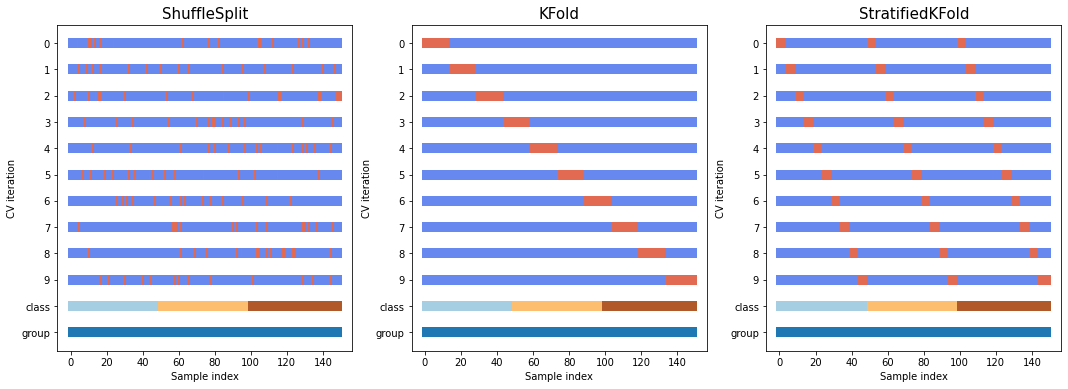

In [ ]:
# Set up a figure with three subplots
fig, ax = plt.subplots(1,3, figsize=(18,6))
# visualise the ShulffleSplit algorithm
plot_cv_indices(ss,
                iris['data'], iris['target'],
                group=None,
                ax=ax[0],
                n_splits=10)
# visualise the KFolds algorithm
plot_cv_indices(kf,
                iris['data'], iris['target'],
                group=None,
                ax=ax[1],
                n_splits=10)
# visualise the StratifiedKFolds algorithm
plot_cv_indices(skf,
                iris['data'], iris['target'],
                group=None,
                ax=ax[2],
                n_splits=10)
plt.show()

Have a look at the above figure and note the following:
- The horizontal bars represent the 150 instances in our data set, with thier index shown on the horizontal axis.
- The vertical axis shows different cross validation iterations, plus an visual indicator of the class for each instance.
  - The blue color indicates training data, while orange represents test data. Not how this changes between the three splitting methods.
  - There are three classes of equal number, so we have three equal length bars in the second to last row. The data are sorted so that the first 50 instances are all of class 0, etc..
- Ignore the "group" row, it's not useful here.

From the above figre, decide which splitting algorithm is likely to give us the best results.

## Use the k-NN classifier
Using the k-NN classifier (`sklearn.neighbors.NearestNeighbors`):
  - Train the classifier with the following options and record the error rate:
    - `weights = uniform` or `distance`
    - `n_neighbors = 1, 3, 7, 11, 17,` or `21`
  - Of the 12 combinations of the above, choose the one with highest accuracy as your *champion*.
  - Create a confusion matrix by comparing the predicted and actual classes for the test data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'weights': ['uniform','distance'], # this should be the different weighting schemes
              'n_neighbors':[1,3,7,11,17,21]} # this should be a list of the nearest neigbhours
# make a classifier object
knn = KNeighborsClassifier()
# create a GridSearchCV object to do the training with cross validation
gscv = GridSearchCV(estimator=knn,
                    param_grid=parameters,
                    cv=skf,  # the cross validation folding pattern
                    scoring='accuracy')
# now train our model
best_knn = gscv.fit(X_train, y_train)

In [ ]:
best_knn.best_params_, best_knn.best_score_

({'n_neighbors': 3, 'weights': 'uniform'}, 0.9727272727272727)

Now that we know what the best parameters are to use, we make a new version of our classifier and train it with all the training data.

In [ ]:
knn = KNeighborsClassifier(weights = best_knn.best_params_['weights'],
                            n_neighbors = best_knn.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

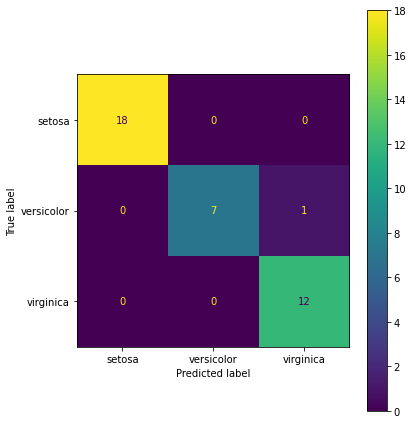

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(knn,
                                      X_test, y_test,
                                      display_labels=iris['target_names'],
                                      ax=ax)
plt.tight_layout()
plt.show()

If you use the data from the above confusion matrix to re-calculate the accuracy, you will likely find it to be slightly different from the "best score" that you found during cross validation.
This difference is due to the fact that we have now trained our model on a larger amount of data, however the difference should be small.

## Inspect the splitting schemes
In the previous plot we found that the test data set had unbalanced classes, even though the input data has a even ratio of three classes.
This is because our initial split of test/train data was done without reguard to the class labels.

Now we will explore the effect of different splitting schemes on the training of our data.
We'll split the data using ShuffleSplit, KFolds, and StratifiedKFolds, and see how that affects the training of the classifier.

Using ShuffleSplit


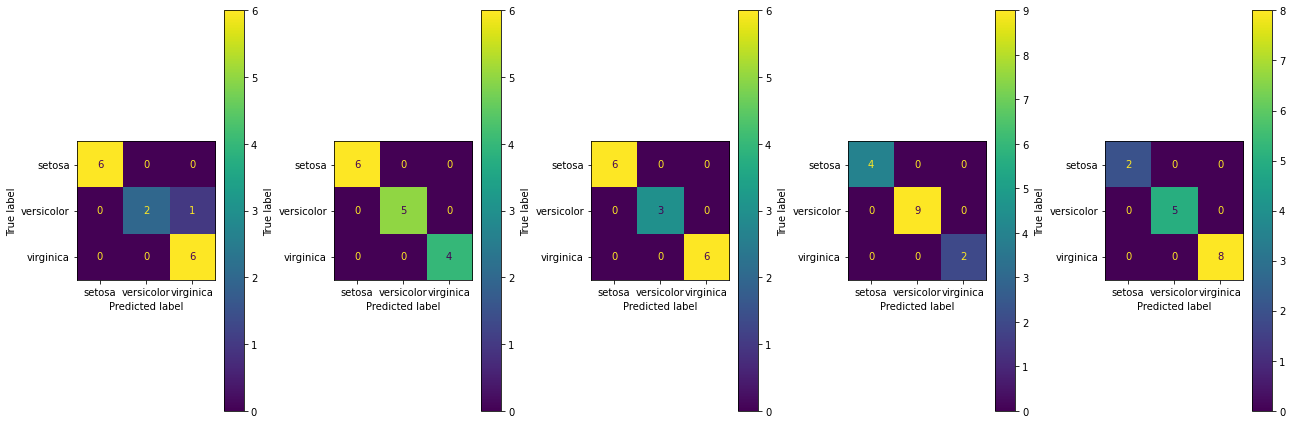

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(18,6))
# remake this object so that we get back to the same random initial state
ss = ShuffleSplit(n_splits=5, test_size=15, random_state=4)
print("Using ShuffleSplit")
for i, (model, validate) in enumerate(ss.split(iris['data'], iris['target'])):
  knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
  classifier = knn.fit(iris['data'][model], iris['target'][model])
  ConfusionMatrixDisplay.from_estimator(classifier,
                                        iris['data'][validate], iris['target'][validate],
                                        display_labels=iris['target_names'],
                                        ax=ax.ravel()[i])


plt.tight_layout()
plt.show()

Note that above we have a fairly good performance, but that occasionally we get an imbalanace of the classes. There are enough samples to have 5 of each class in the test set, but wou will occasionally see 2 or 1 samples for a class (or maybe zero if you are very unlucky).

Using KFolds


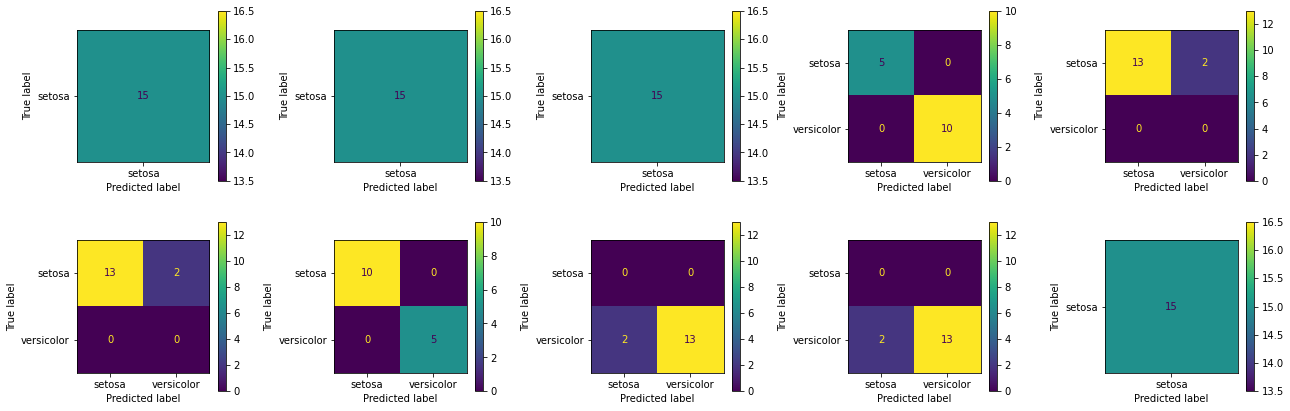

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(18,6))

print("Using KFolds")
for i, (model, validate) in enumerate(kf.split(iris['data'], iris['target'])):
  knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
  classifier = knn.fit(iris['data'][model], iris['target'][model])
  ConfusionMatrixDisplay.from_estimator(classifier,
                                        iris['data'][validate], iris['target'][validate],
                                        display_labels=iris['target_names'],
                                        ax=ax.ravel()[i])


plt.tight_layout()
plt.show()

This will likely break for you, since all the splits result in only 1-2 of the three classes being present in the test data, and this confuses the confusion matrix display function. Don't be concerned about doing something wrong, this is just a demonstration of why KFolds can fail in spectacular ways.

Using StratifiedKFolds


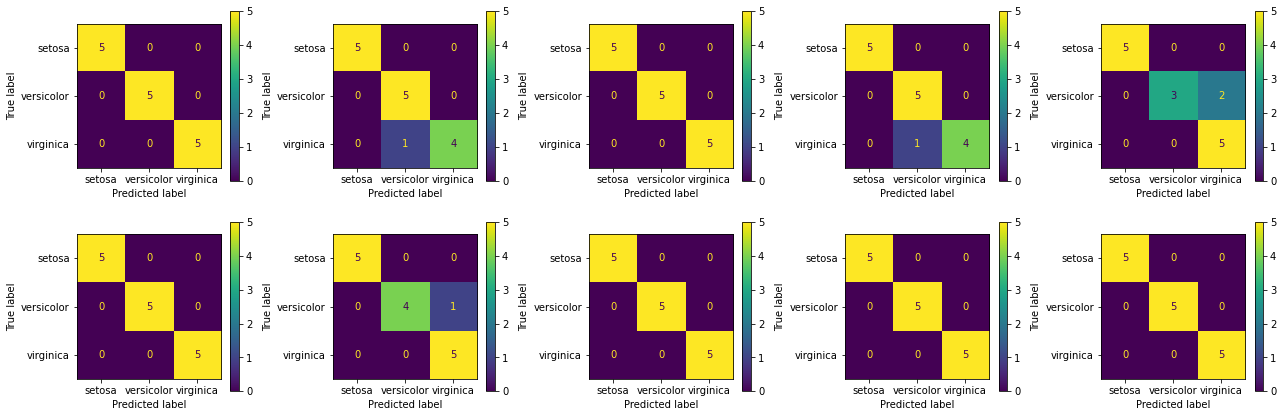

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(18,6))

print("Using StratifiedKFolds")
for i, (model, validate) in enumerate(skf.split(iris['data'], iris['target'])):
  knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
  classifier = knn.fit(iris['data'][model], iris['target'][model])
  ConfusionMatrixDisplay.from_estimator(classifier,
                                        iris['data'][validate], iris['target'][validate],
                                        display_labels=iris['target_names'],
                                        ax=ax.ravel()[i])


plt.tight_layout()
plt.show()

## Use a descision tree classifier
Using a descision tree classifier:
 - Train the classifier using both the `Gini index` and `entropy` criterion for splitting, and a range of `min_samples_split` between 3 and 20.
 - Choose the classifier which has the highest accuracy score as your best classifier.
 - Plot the descision tree for your best classifier.

In [ ]:
from sklearn import tree

In [ ]:
# Create a dictionary of all the parameters we'll be iterating over
parameters = {'criterion': ('gini','entropy'),  # this should be the different splitting criteria
              'min_samples_split':[3,10,15,20]} # this should be the different values for min_samples_split
dtc = tree.DecisionTreeClassifier()
gscv = GridSearchCV(estimator=dtc,
                    param_grid=parameters,
                    cv=5,
                    scoring='accuracy')
best_dtc = gscv.fit(X_train, y_train)
best_dtc.best_params_, best_dtc.best_score_

({'criterion': 'gini', 'min_samples_split': 15}, 0.9470355731225297)

Now that we know what the best parameters are to use, we make a new version of our classifier and train it with all the training data.

In [ ]:
dtc = tree.DecisionTreeClassifier(criterion=best_dtc.best_params_['criterion'],
                                  min_samples_split=best_dtc.best_params_['min_samples_split'])
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=15)

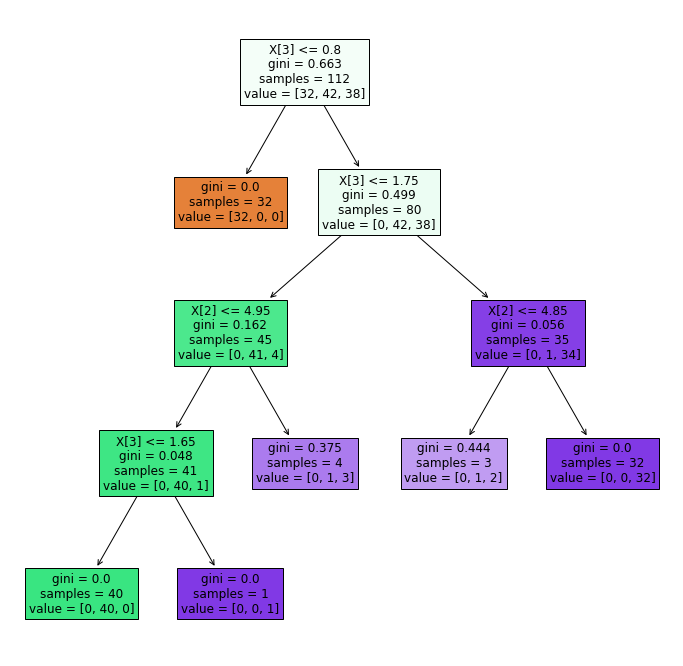

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
tree.plot_tree(dtc,
               filled=True, # color the nodes based on class/purity
               ax=ax, fontsize=12)
plt.show()

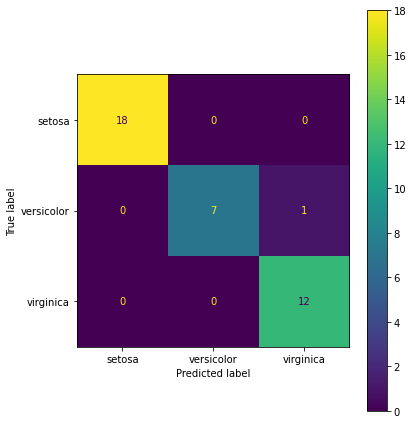

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(dtc,
                                      X_test, y_test,
                                      display_labels=iris['target_names'],
                                      ax=ax)
plt.tight_layout()
plt.show()

## Use a naive-Bayes clasffieir
Using a naive-Bayes clasffieir:
 - Train the classifier on all the training data.
 - Predict the classes of the test data.
 - Plot a confusion matrix.

In [ ]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score

NB accuracy is 0.974


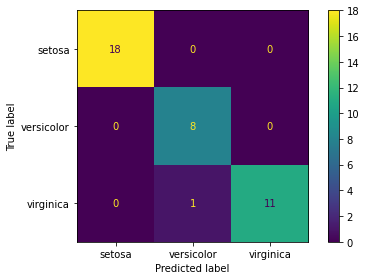

In [ ]:
# no parameters to adjust so no need to optimise, just train
fig, ax = plt.subplots(1,1)
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"NB accuracy is {accuracy:5.3f}")

ConfusionMatrixDisplay.from_estimator(nb,
                                      X_test, y_test,
                                      display_labels=iris['target_names'],
                                      ax=ax)
plt.tight_layout()
plt.show()

# Helpful tools

## Corner plot

A useful plot for visualising multi-dimensional data is the corner-plot or pair plot.
There is a function built into pandas called `scatter_matrix`, and the plotting package `seaborn` also has a function called `pairplot`.
Let's have a look at them below.

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# Load the data and labels as data frams and then join them to make a new one
df1 = pd.DataFrame(iris['data'], columns=iris.feature_names)
df2 = pd.DataFrame(iris['target'], columns=['class'])
df = df1.join(df2)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Plotted with pandas


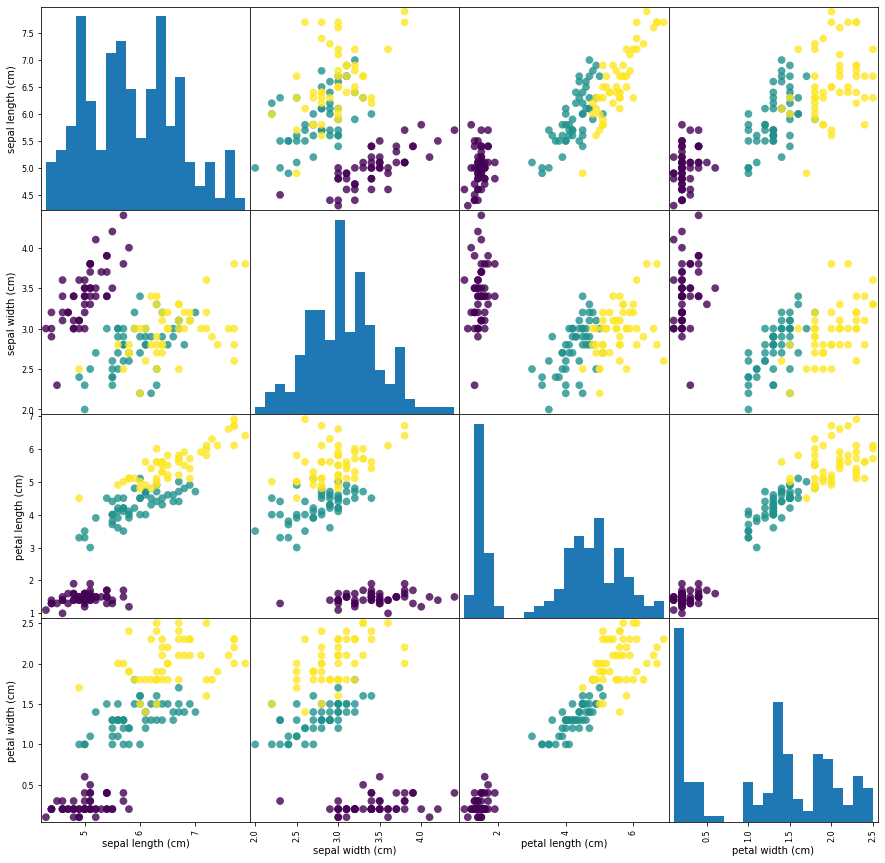

In [ ]:
pd.plotting.scatter_matrix(df1,c=df['class'], figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)
print('Plotted with pandas')

Plotted with seaborn


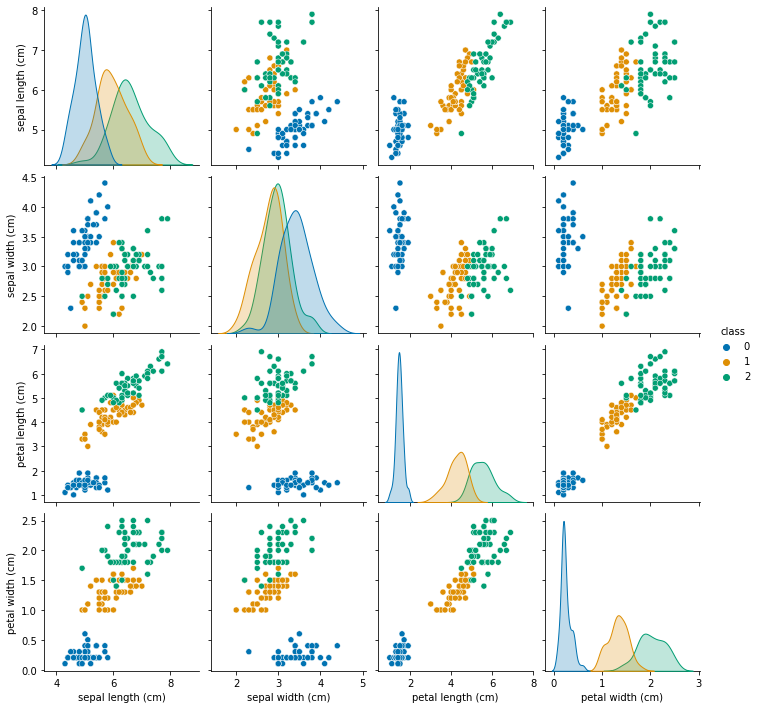

In [ ]:
sns.pairplot(df, hue='class', palette=sns.color_palette('colorblind',3))
print("Plotted with seaborn")

The thing that I most prefer about the seaborn plot is that the diagonal entries are still separated by class.
From this plot it is clear that the last two features are good at separating the three classes, where as the first two attributes are not so useful.

## Correlation plot

A correlation matrix is simlar to the corner plot above but it simply reports the correlation between each of the attributes.

We can compute the correlation matrix using pandas with the `df.corr()` method, and the plot using either `matplotlib` or `seaborn`.

In [ ]:
# compute correlation matrix
cor = df.corr()

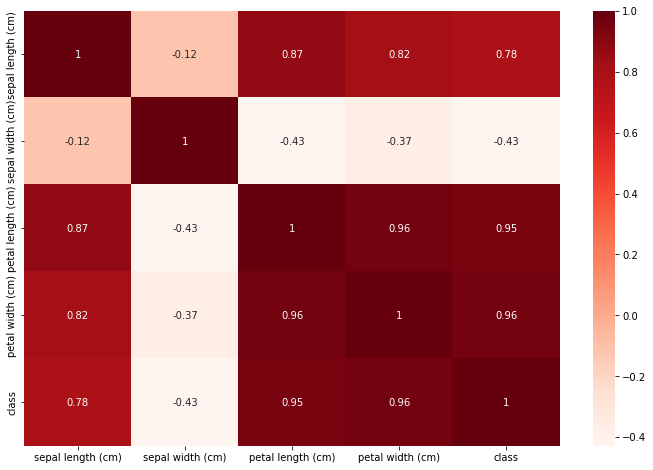

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
# use seaborn to do the plot
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, ax=ax)

Looking at the correlation plot we can see that the petal length/width are highly correlated with the class attribute and are likely useful attributes.
The fact that they are also highly correlated with each other means that we might be able to use just one of the two features.

The sepal width has much lower correlation and so is probably not so useful.

## Saving data to an sqlite database

In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect('Answers.sqlite')

In [ ]:
df.to_sql(name='data',
          con=con,
          index=False) # don't save the index column to the output

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
con.close()